### Neuroevolution:
- Bild -> preprocessing -> CNN -> MLP -> Eingabe (NES controller)
- CNN und MLP basieren auf pytorch
- Es wird der gegebene Reward von super mario gym genommen

#### ToDo:
- Hyperparameter suche
- Hilfsplott mit wichtigen Informationen zum aktuellen training: Anzahl in Prozent wie viele Agenten aus Mutationen von Eliteagenten in aktueller Generation enstanden sind
- Dynamische Mutation (z.B: erhöhe Mutationsstärke bei Stillstand)
- Gespeicherte models nochmal finetunen, testen, überüfen ob die wirklich konstant gute Ergebnisse haben

#### Nice to have:
- Verbesserung der GPU Auslastung (Hat sich als schwierig herausgestellt, im Moment ist cpu-only schneller!)
- Frame skipping um performance zu erhöhen (Auch schwierig hauptlast ist nicht die entscheidung des agenten sondern die laufende mario umgebung)
- Percentage clipping für die eliteagents?

In [ ]:
import torch
from src.non_reinforcement.neuroevolution.neuroevolution_trainer import NeuroevolutionTrainer
from src.non_reinforcement.neuroevolution.neuroevolution_net import NeuroevolutionNet
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT, SIMPLE_MOVEMENT, RIGHT_ONLY
%config InlineBackend.figure_format = 'retina'

DEVICE = "cpu"  #torch.device("cuda" if torch.cuda.is_available() else "cpu")

CNN_CONFIG = [
    {"out_channels": 16, "kernel_size": 8, "stride": 4},
    {"out_channels": 32, "kernel_size": 4, "stride": 2},
]

MLP_CONFIG = [
    32 * 9 * 9,  # Must match flattened output of CNN
    256,
    128,
    len(RIGHT_ONLY)
]

model = NeuroevolutionNet(
    input_channels=1,
    num_actions=len(RIGHT_ONLY),
    cnn_config=CNN_CONFIG,
    mlp_config=MLP_CONFIG
)

trainer = NeuroevolutionTrainer(
    base_model=model,
    env_name='SuperMarioBros-1-1-v0',
    action_set=RIGHT_ONLY,
    device=DEVICE,
    directory="../runs/neuroevolution",
    generations=3,
    population_size=2,
    max_steps_per_episode=200,
    mutation_rate_range=(0.02, 0.2),
    mutation_strength_range=(0.01, 0.1),
    roulette_wheel_selection_temperature=1.1,
    elitism=1
)

#trainer.run()
#trainer.record_best_agent()
#trainer.save_metrics()
#trainer.save_best_model()

# Random Hyperparameter Search 1

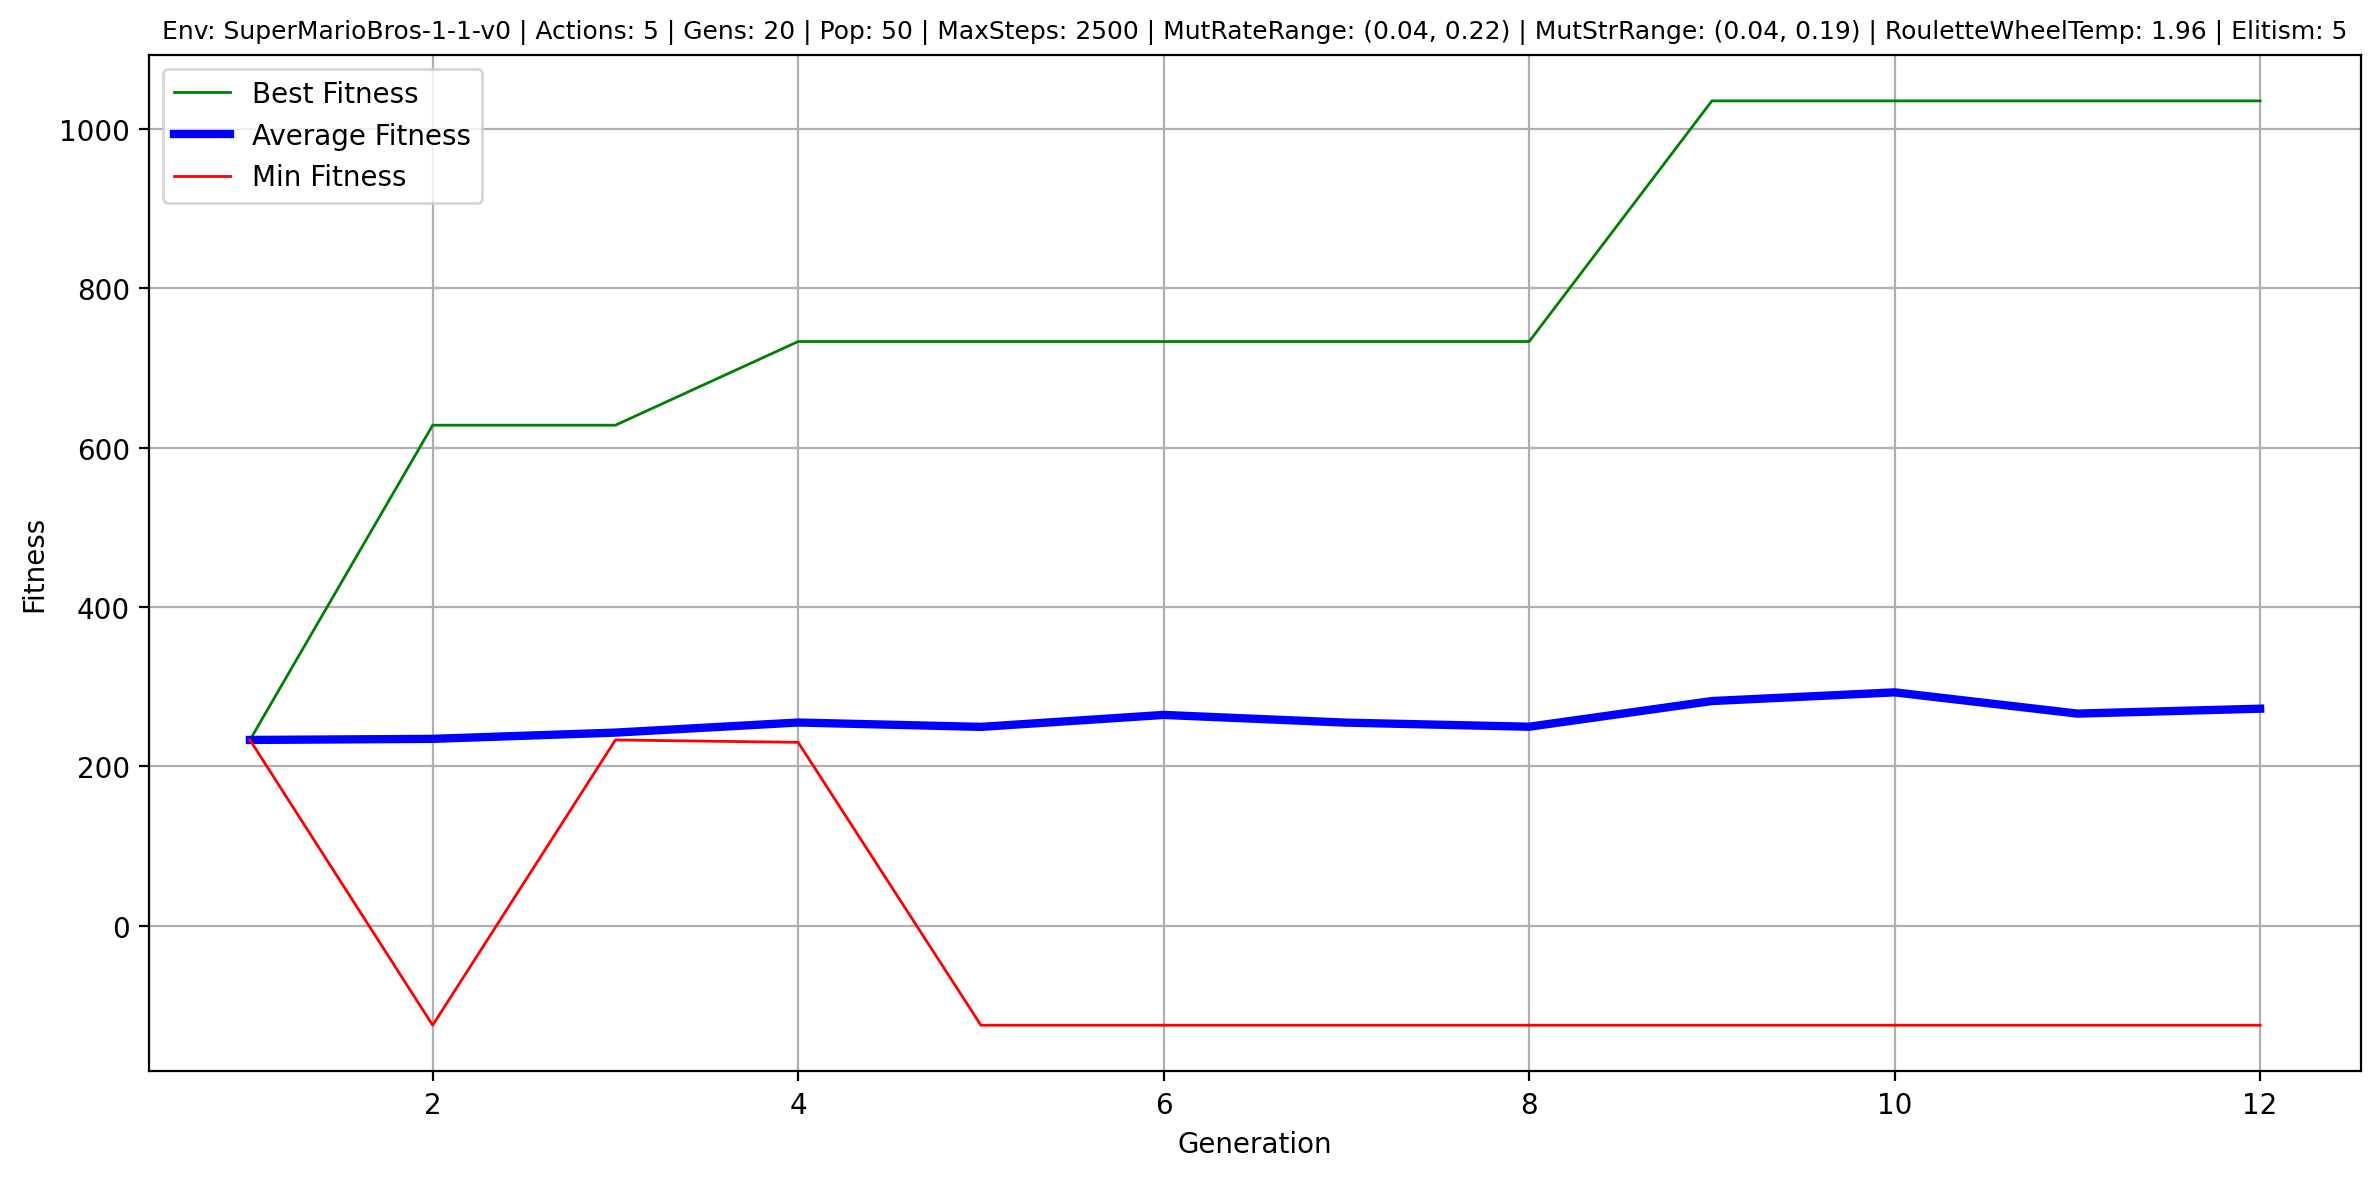

In [ ]:
import random
from src.non_reinforcement.neuroevolution.neuroevolution_trainer import NeuroevolutionTrainer
from src.non_reinforcement.neuroevolution.neuroevolution_net import NeuroevolutionNet
from gym_super_mario_bros.actions import RIGHT_ONLY
%config InlineBackend.figure_format = 'retina'

# Constants
CNN_CONFIG = [
    {"out_channels": 16, "kernel_size": 8, "stride": 4},
    {"out_channels": 32, "kernel_size": 4, "stride": 2},
]
MLP_CONFIG = [
    32 * 9 * 9,  # Must match flattened output of CNN
    256,
    128,
    len(RIGHT_ONLY)
]
ENV_NAME = 'SuperMarioBros-1-1-v0'
ACTION_SET = RIGHT_ONLY
DEVICE = "cpu"
DIRECTORY = "../runs/neuroevolution/random_hyperparameter_search_1"
GENERATIONS = 20
POPULATION_SIZE = 50
MAX_STEPS_PER_EPISODE = 2500

# Hyperparameter search ranges
MUTATION_RATE_SELECTION_INTERVAL = (0.00, 0.3)

MUTATION_STRENGTH_SELECTION_INTERVAL = (0.00, 0.2)

ROULETTE_TEMP_MIN = 0.5
ROULETTE_TEMP_MAX = 2.0

ELITISM_OPTIONS = [0, 1, 2, 3, 4, 5]

while True:
    model = NeuroevolutionNet(
        input_channels=1,
        num_actions=len(RIGHT_ONLY),
        cnn_config=CNN_CONFIG,
        mlp_config=MLP_CONFIG
    )

    r1 = round(random.uniform(*MUTATION_RATE_SELECTION_INTERVAL), 2)
    r2 = round(random.uniform(*MUTATION_RATE_SELECTION_INTERVAL), 2)
    mutation_rate_range = tuple(sorted((r1, r2)))

    r1 = round(random.uniform(*MUTATION_STRENGTH_SELECTION_INTERVAL), 2)
    r2 = round(random.uniform(*MUTATION_STRENGTH_SELECTION_INTERVAL), 2)
    mutation_strength_range = tuple(sorted((r1, r2)))

    roulette_wheel_selection_temperature = round(random.uniform(ROULETTE_TEMP_MIN, ROULETTE_TEMP_MAX), 2)
    elitism = random.choice(ELITISM_OPTIONS)

    trainer = NeuroevolutionTrainer(
        base_model=model,
        env_name=ENV_NAME,
        action_set=ACTION_SET,
        device=DEVICE,
        directory=DIRECTORY,
        generations=GENERATIONS,
        population_size=POPULATION_SIZE,
        max_steps_per_episode=MAX_STEPS_PER_EPISODE,
        mutation_rate_range=mutation_rate_range,
        mutation_strength_range=mutation_strength_range,
        roulette_wheel_selection_temperature=roulette_wheel_selection_temperature,
        elitism=elitism
    )
    trainer.run()
    trainer.record_best_agent()
    trainer.save_metrics()
    trainer.save_best_model()